# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка PyTorch. 

## На сегодняшней лекции мы разберем, зачем нужны фреймворки для глубинного обучения и как устроены базовые методы и классы PyTorch

In [2]:
import IPython
IPython.display.Image("what is pytorch.png")

FileNotFoundError: No such file or directory: 'what is pytorch.png'

FileNotFoundError: No such file or directory: 'what is pytorch.png'

<IPython.core.display.Image object>

#        Пример обучения нейронной сети в numpy

In [3]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 33858510.47415705
1 27423519.129594617
2 25120215.077685647
3 22643939.308428265
4 18582801.97333031
5 13523952.576758685
6 8908518.032258945
7 5534087.336194953
8 3426001.1108909203
9 2199177.6493885946
10 1499061.766891729
11 1089332.11170208
12 837195.0706683681
13 671484.3905348914
14 555244.2577955734
15 468812.66671251244
16 401761.1701549196
17 347974.24882684974
18 303728.8718670243
19 266700.8877570672
20 235290.03221614024
21 208463.0366508543
22 185363.6553507269
23 165361.54758035776
24 147952.71041038135
25 132736.88702348364
26 119384.97672237434
27 107622.65371256787
28 97234.41275297618
29 88036.79008335838
30 79865.08999276633
31 72578.13701353892
32 66061.68424455533
33 60220.74404887479
34 54984.29344370843
35 50277.99345342794
36 46032.17580405202
37 42198.343761024626
38 38733.321364943375
39 35588.9087344371
40 32732.52355005157
41 30134.876639734786
42 27769.015935576197
43 25616.471720467343
44 23652.710510603345
45 21857.60695450336
46 20214.71318664244
47 18

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от __np.ndarray__, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [4]:
import torch

In [5]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [6]:
x

tensor([[9.2755e-39, 1.0561e-38, 7.8061e-39],
        [9.2755e-39, 8.4490e-39, 9.6428e-39],
        [1.1112e-38, 9.5511e-39, 1.0102e-38],
        [1.0286e-38, 1.0194e-38, 9.6429e-39],
        [9.2755e-39, 9.1837e-39, 9.3674e-39]])

In [7]:
# Типы
torch.FloatTensor
torch.LongTensor
torch.ByteTensor

torch.ByteTensor

In [8]:
x = torch.Tensor(5, 3).type(torch.FloatTensor)

In [9]:
# инициализируем тензор нормальным распределением
x = torch.randn(5, 3)

In [10]:
x

tensor([[ 0.7254,  2.5394,  1.6359],
        [ 0.6329, -1.6918,  1.2795],
        [ 0.7820, -0.4302,  0.4346],
        [ 0.4444, -1.5864, -0.8449],
        [-0.3332, -1.3021,  0.2267]])

In [11]:
x.shape

torch.Size([5, 3])

In [12]:
x.size()

torch.Size([5, 3])

In [13]:
y = torch.rand(5, 3)

In [14]:
y

tensor([[0.8304, 0.9097, 0.2682],
        [0.9889, 0.5161, 0.4583],
        [0.2588, 0.5099, 0.3624],
        [0.7761, 0.3402, 0.9587],
        [0.9627, 0.2881, 0.6413]])

In [15]:
# Первый способ сложить 2 тензора
x + y

tensor([[ 1.5558,  3.4491,  1.9041],
        [ 1.6217, -1.1757,  1.7379],
        [ 1.0408,  0.0797,  0.7969],
        [ 1.2205, -1.2462,  0.1139],
        [ 0.6295, -1.0140,  0.8679]])

In [ ]:
# Второй способ сложить 2 тензора
x.add(y)

In [ ]:
# А еще можно так:
torch.add(x, y)

In [ ]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)

In [ ]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

In [13]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [14]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)

tensor([[-0.5447,  1.9633, -1.1904, -0.2969],
        [ 1.4183,  0.5922, -1.2288, -1.2513],
        [ 1.3212, -0.0176, -0.1810, -0.8891],
        [-1.8080,  0.7978,  0.6706,  1.0838],
        [-0.3988,  0.8769, -0.5504, -0.0330]])

In [15]:
# для python 3

a @ b

tensor([[-0.5447,  1.9633, -1.1904, -0.2969],
        [ 1.4183,  0.5922, -1.2288, -1.2513],
        [ 1.3212, -0.0176, -0.1810, -0.8891],
        [-1.8080,  0.7978,  0.6706,  1.0838],
        [-0.3988,  0.8769, -0.5504, -0.0330]])

In [6]:
device = torch.cuda.device(3)

In [2]:
torch.cuda.set_device(3)

Поменяем пару строчек в обучении на __numpy__ и код уже можно запускать и на GPU. Например, __dtype = torch.cuda.FloatTensor__

In [3]:
dtype = torch.FloatTensor
dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 tensor(36219916., device='cuda:3')
1 tensor(34578632., device='cuda:3')
2 tensor(42283664., device='cuda:3')
3 tensor(50791608., device='cuda:3')
4 tensor(49222588., device='cuda:3')
5 tensor(33252724., device='cuda:3')
6 tensor(15466472., device='cuda:3')
7 tensor(5895302., device='cuda:3')
8 tensor(2542917.5000, device='cuda:3')
9 tensor(1469493.2500, device='cuda:3')
10 tensor(1060498., device='cuda:3')
11 tensor(848049.7500, device='cuda:3')
12 tensor(706445., device='cuda:3')
13 tensor(599043.7500, device='cuda:3')
14 tensor(513120.8750, device='cuda:3')
15 tensor(442726.0625, device='cuda:3')
16 tensor(384323.9375, device='cuda:3')
17 tensor(335367.8438, device='cuda:3')
18 tensor(294021.8125, device='cuda:3')
19 tensor(258881.6562, device='cuda:3')
20 tensor(228858.5312, device='cuda:3')
21 tensor(203044.6406, device='cuda:3')
22 tensor(180765.9062, device='cuda:3')
23 tensor(161436.7188, device='cuda:3')
24 tensor(144610.5000, device='cuda:3')
25 tensor(129886.3594, device='c

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [4]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [14]:
# В pytorch начиная с версии 1.0, Tensor может содержать в себе всю эту информацию
import torch
from torch.autograd import Variable
x = torch.ones(2, 2, requires_grad=True)
x  

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [15]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [16]:
x.grad

In [17]:
# производная операции, которая породила переменную.
x.grad_fn

# Задаем граф вычислений: #

In [18]:
y = x + 2
z = y * y * 2
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward1>)

In [19]:
# Запускаем бэкпроп
out.backward()

In [20]:
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [21]:
out.grad == None

True

# Что произошло?

__autograd__ строит ациклический граф вычисления из переменных и операций (функций)
__out.backward__ проходит по всему графу начиная от вершины out и считает градиенты вершин

В __pyTorch__ начиная с версии 0.3 промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения можно использовать
функцию __tensor.register_hook(print)__
или использовать __tensor.retain_grad()__

In [22]:
from __future__ import print_function
x = torch.ones(2, 2, requires_grad = True)
y.register_hook(print)
y = x + 2
z = y * y * 2
z.register_hook(print)
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward1>)

In [23]:
out.backward()

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [24]:
v = torch.randn(3, requires_grad=True)
v2 = v+1
v2.retain_grad()
v2.sum().backward()
v2.grad

tensor([1., 1., 1.])

In [26]:
v.grad

tensor([1., 1., 1.])

Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [29]:
f = torch.randn(2, requires_grad=True)
g = f[0] * f[1]
g.backward(retain_graph=True)
f.grad
g.backward()
f.grad

tensor([-1.0429,  2.9813])

In [30]:
f = torch.randn(2, requires_grad=True)
g = f[0] * f[1]
g.backward()
f.grad
g.backward()
f.grad

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [31]:
x = torch.ones(2, 2, requires_grad=True )
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad



tensor([[1., 1.],
        [1., 1.]])

__torch.autograd.Function__ - базовый класс дифференецируемых функций-составных частей графа вычислений

In [32]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input



In [39]:
MyReLU()(torch.randn(2))

tensor([0.0000, 0.0818])

# Снова вернемся к исходной двухслойной сети

In [55]:
import torch

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = torch.randn(N, D_in, requires_grad=False).type(dtype)
y = torch.randn(N, D_out, requires_grad=False).type(dtype)


w1 = torch.randn(D_in, H, requires_grad=True).type(dtype)
w2 = torch.randn(H, D_out, requires_grad=True).type(dtype)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    
    # Обнуляем градиенты
    if w1.grad is not None:
        w1.grad.data.zero_()
    if w2.grad is not None:
        w2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

0 29367932.0
1 27402180.0
2 29811580.0
3 32248536.0
4 30409340.0
5 23481660.0
6 14536459.0
7 7806761.0
8 4030036.5
9 2250575.25
10 1429067.5
11 1026983.5625
12 803742.25
13 661633.625
14 560091.625
15 481686.46875
16 418303.9375
17 365697.65625
18 321389.75
19 283670.90625
20 251389.546875
21 223555.15625
22 199430.6875
23 178439.765625
24 160092.828125
25 144012.5
26 129869.640625
27 117380.1640625
28 106310.4296875
29 96475.265625
30 87712.09375
31 79886.4453125
32 72873.609375
33 66579.578125
34 60908.8828125
35 55798.5625
36 51183.73828125
37 47008.28125
38 43228.21875
39 39809.546875
40 36700.08984375
41 33869.9921875
42 31288.65625
43 28929.072265625
44 26771.3203125
45 24794.119140625
46 22981.240234375
47 21316.984375
48 19787.078125
49 18379.3984375
50 17082.82421875
51 15887.2177734375
52 14783.9697265625
53 13764.67578125
54 12822.8974609375
55 11950.9560546875
56 11143.654296875
57 10395.677734375
58 9702.6748046875
59 9060.171875
60 8464.3994140625
61 7910.82568359375
62 7

# Наконец, в PyTorch базовые слои нейронных сетей уже реализованы.

### ``Sequental`` - последовательность базовых слоев и функций активаций
### ``Linear(input dimension, output dimension)`` - линейный слой
### ``torch.nn.ReLU``, ``torch.nn.Sigmoid``,``torch.nn.Tanh``, etc. - функции активации
### ``torch.nn.MSELoss`` - среднеквадратичная функция потерь.

In [1]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = torch.randn(N, D_in, requires_grad=False)
y = torch.randn(N, D_out, requires_grad=False)
print(type(x))
model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

NameError: name 'torch' is not defined

In [ ]:
loss_fn(model(x), y)

# А еще в PyTorch есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [57]:
N, D_in, D_out = 64, 1000, 10

x = torch.randn(N, D_in, requires_grad=False)
y = torch.randn(N, D_out, requires_grad=False)


model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),
        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

0 844.0172729492188
1 829.427734375
2 814.9829711914062
3 800.6852416992188
4 786.5366821289062
5 772.5391845703125
6 758.6947021484375
7 745.0048828125
8 731.471435546875
9 718.0957641601562
10 704.8794555664062
11 691.8236083984375
12 678.9293212890625
13 666.1976318359375
14 653.6293334960938
15 641.22509765625
16 628.9854125976562
17 616.9107055664062
18 605.0013427734375
19 593.2572631835938
20 581.6785888671875
21 570.2651977539062
22 559.0167846679688
23 547.93310546875
24 537.013671875
25 526.2578735351562
26 515.6651611328125
27 505.2347106933594
28 494.96575927734375
29 484.857421875
30 474.90863037109375
31 465.118408203125
32 455.485595703125
33 446.009033203125
34 436.6875
35 427.51971435546875
36 418.5043029785156
37 409.639892578125
38 400.9251403808594
39 392.3585205078125
40 383.9385681152344
41 375.663818359375
42 367.5326843261719
43 359.5436096191406
44 351.6950378417969
45 343.9853515625
46 336.4129638671875
47 328.97625732421875
48 321.673583984375
49 314.50332641

In [58]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [ ]:
# Сохранение
def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)

epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [ ]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = 
        self.layer2 = 

    def forward(self, x):
        pass

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). __PyTorch__ имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.


Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 1. 34.]
 [-1. 45.]
 [ 0. 56.]
 [ 1. 66.]]


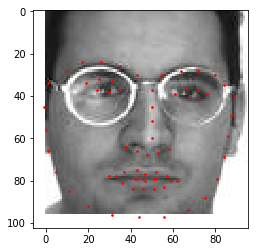

In [1]:
%matplotlib inline
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [2]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


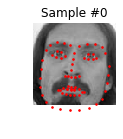

1 (96, 96) (68, 2)


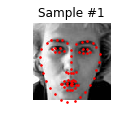

2 (96, 96) (68, 2)


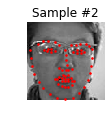

3 (96, 96) (68, 2)


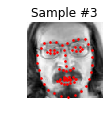

In [3]:
face_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                    root_dir='dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [4]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 68x68 и вырежем случайную область 60x60

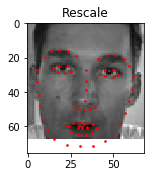

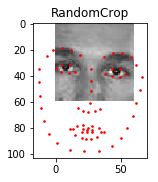

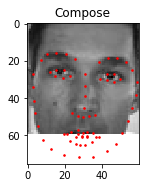

In [5]:
scale = Rescale(68)
crop = RandomCrop(60)
composed = transforms.Compose([Rescale(68),
                               RandomCrop(60)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [6]:
transformed_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                           root_dir='dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


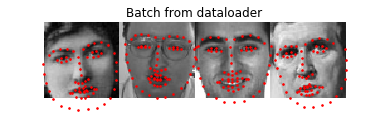

In [7]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("dataset/train/face_landmarks.csv")

# Profiling

### В модуле ``torch.autograd.profiler`` реализованы методы для замера времени исполнения различных операций в PyTorch

In [24]:
x = torch.randn((2, 3), requires_grad=True)
a = torch.randn((3, 3), requires_grad=False)
with torch.autograd.profiler.profile() as prof:
    for _ in range(1000):
        y = (x @ a).norm()
        y.backward()

### Так же могут быть полезны утилиты ``cProfile``, ``torch.utils.bottleneck``,  ``snakeviz``